<a href="https://colab.research.google.com/github/AgungPambudi/data-science/blob/main/overfit_and_underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Overfit dan underfit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Lihat di TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Jalankan di Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Lihat sumber kode di GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Unduh notebook</a>
  </td>
</table>

Seperti biasa, kode dalam contoh ini akan menggunakan API dari `tf.keras`, dimana Anda dapat mempelajari lebih jauh tentang hal ini di Tensorflow [Petunjuk Keras](https://www.tensorflow.org/guide/keras).

Pada kedua contoh sebelumnya—teks klasifikasi](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub) dan [prediksi efisiensi bahan bakar](https://www.tensorflow.org/tutorials/keras/regression) — kita melihat bahwa akurasi dari model ketika diuji dengan data validasi akan mencapai puncaknya setelah beberapa kali epoch proses training dilakukan, kemudian nilainya akan stagnan atau mulai menurun.

Dengan kata lain, model kita *overfit* terhadap data training. Mempelajari bagaimana untuk menyelesaikan permasalahan *overfitting* sangat penting. Meskipun model kita seringkali memperoleh akurasi yang tinggi pada *set training*, apa yang sebenarnya kita mau adalah membangun model yang dapat bekerja dengan baik pada *set tes* (atau data yang model tersebut belum pernah lihat sebelumnya).

Kebalikan dari *overfitting* adalah *underfitting*. Underfitting terjadi ketika masih ada ruang untuk pengembangan model terhadap data tes. Hal ini dapat terjadi karena beberapa hal: Apabila model yang dihasilkan tidak cukup baik, *over-regularized*, atau model belum dilatih cukup lama. Artinya, model neural network belum mempelajari pola yang ada di data training.

Jika Anda melatih model terlalu lama, model tersebut akan mulai menjadi overfit dan akan mempelajari pola yang terdapat pada data training yang tidak terdapat pada data tes. Kita membutuhkan keseimbangan. Memahami bagaimana cara untuk melatih model dengan jumlah epoch yang tepat sebagaimana yang akan kita pelajari di sini merupakan skill yang bermanfaat.

Untuk menghindari *overfitting*, solusi terbaik adalah dengan menggunakan data training lebih menyeluruh. Dataset seharusnya melingkupi seluruh input yang model dapat urus. Penambahan data mungkin akan berguna jika data yang ditambahkan dapat menjelaskan kasus yang baru dan menarik. 

Model yang dilatih pada data yang lebih lengkap akan secara alami menggeneralisasi lebih baik. Apabila hal tersebut tidak mungkin untuk dilakukan, solusi terbaik lainnya adalah menggunakan teknik seperti regularisasi. Teknik ini memberikan batasan terhadap jumlah dan tipe informasi yang dapat disimpan oleh model. Apabila model neural network hanya dapat menyimpan sedikit pola, proses optimisasi akan menghendaki model untuk fokus pada pola yang paling penting, pola yang memiliki kemungkinan untuk dapat menggeneralisasi dengan baik.

Dala notebook ini, kita akan melakukan eksplorasi beberapa teknik regularisasi yang sering digunakan, dan akan menggunakan teknik tersebut untuk meningkatkan performa dari model klasifikasi.

## Pengaturan

Sebelum memulai, import *package* yang diperlukan:

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [4]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-n63m3bxw
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-n63m3bxw
  Resolved https://github.com/tensorflow/docs to commit abfbe6e54864baa38dbb985b984acd304be610d4
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=183273 sha256=6dcd7e08f46658596e9bc7ca5dfd52149014be04e7207ba2f2671ae16fc4360b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4t9joh0y/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [6]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

## Dataset Higgs

Tujuan dari tutorial ini tidak untuk mempelajari fisika partikel, jadi jangan terlalu memikirkan detail dari dataset ini. Data ini memilliki 11&#x202F;000&#x202F;000 baris data, masing-masing memiliki 28 fitur, dan memiliki sebuah label dengan kelas biner.

In [7]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz')

2816407858/2816407858 [==============================] - 147s 0us/step


In [8]:
FEATURES = 28

Kelas `tf.data.experimental.CsvDataset` dapat digunakan untuk membaca data csv secara langsung dari file gzip tanpa memerlukan proses dekompresi terlebih dahulu.

In [9]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

Kelas yang digunakan untuk membaca csv tersebut mengembalikan sebuah list skalar untuk masing-masing data. Fungsi berikut ini digunakan untuk menggabungkan list skalar tersebut menjadi (feature_vector, label).

In [10]:
def pack_row(*row):
  row = list(row)
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

TensorFlow sangat efisien ketika beroperasi pada batch data yang besar.

Oleh karena itu, kita *repacking* setiap data secara individual membuat sebuah `Dataset` baru yang mengambil batch 10000 data, menggunakan fungsi `repack_row` untuk setiap batch, dan kemudian memisahkan batch-batch tersebut menjadi data individual:

In [11]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

Lihatlah beberapa data dari `packed_ds` ini.

Fitur yang ada belum dinormalisasi secara sempurna, tetapi nilai tersebut sudah cukup untuk tutorial ini.

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


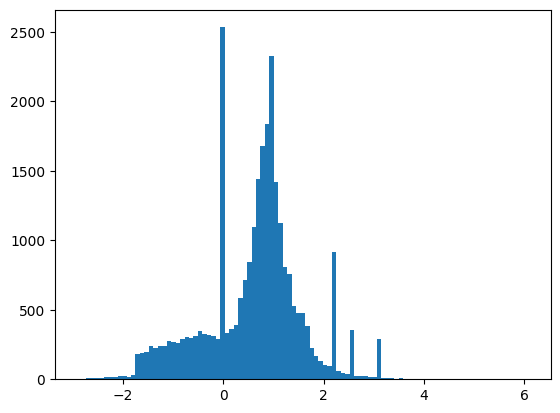

In [12]:
for features,label in packed_ds.batch(1000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

Untuk membuat tutorial ini tetap singkat, hanya 1000 sampel pertama yang digunakan untuk validasi, dan 10 000 sampel selanjutnya untuk training:

In [13]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

*method* `Dataset.skip` dan `Dataset.take` membuat hal ini menjadi mudah.

Pada saat yang bersamaan, gunakan *method* `Dataset.cache` untuk memastikan bahwa loader tidak perlu membaca kembali data dari file setiap epoch:

In [14]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [15]:
train_ds

<CacheDataset element_spec=(TensorSpec(shape=(28,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

Dataset-dataset ini mengembalikan nilai dari individual data. Gunakan *method* `.batch` untuk membuat batch-batch dengan ukuran data untuk training yang tepat. Sebelum membuat batch, ingat juga untuk `.shuffle` dan `.repeat` set training-nya.

In [16]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

## Menunjukkan overfitting

Cara paling sederhana untuk mencegah overfitting adalah dengan memulai model yang sederhana: Sebuah model dengan jumlah parameter dapat dipelajari yang sedikit (ditentukan dengan jumlah layer dan jumlah unit tiap layer). Dalam deep learning, jumlah dari parameter dapat dipelajari dalam sebuah model sering disebut juga dengan "kapasitas" model.

Secara intiusi, sebuah model dengan lebih banyak parameter akan memiliki lebih banyak "kapasitas memori" dan dapat dengan mudah mempelajari pemetaan hubungan antara sampel training dan targetnya, sebuah pemetaan tanpa kemampuan generalisasi, tetapi hal ini akan menjadi tidak bermanfaat ketika membuat prediksi terhadap data yang belum pernah dilihat sebelumnya.

Selalu ingat hal ini: model deep learning cenderung mampu untuk fit data training dengan baik, tetapi tantangan yang sebenarnya adalah generalisasi, bukan proses fitting tersebut.

Di lain pihak, apabila model neural network memiliki kapasitas memori yang terbatas, model tersebut tidak akan mampu untuk mempelajari pemetaan dengan mudah. Untuk meminimalisir nilai kerugian, model harus mempelajari representasi yang memiliki kemampuan prediktif yang kuat. Pada saat yang bersamaan, apabila Anda membuat model Anda terlalu sederhana, model yang dibuat akan sulit untuk fit terhadap data training. Terdapat keseimbangan antara "terlalu banyak kapasitas" dan "kapasitas tidak tercukupi".

Sayangnya, tidak terdapat formula magis untuk menentukan ukuran atau arsitektur yang tepat dari model Anda (dalam hal jumlah layer, atau jumlah yang tepat untuk setiap layer). Anda harus bereksperimen menggunakan berbagai macam arsitektur yang berbeda.  
Untuk menemukan ukuran model yang tepat, hal terbaik yang dilakukan adalah dengan memulai model dengan sedikit layer dan parameter, kemudian mulai menambah ukuran dari layer atau menambah layer baru hingga Anda melihat nilai kerugian validasi menurun.

Mulai dengan model sederhana menggunakan  `layers.Dense` sebagai baseline, kemudian buat versi yang lebih besar, dan bandingkan performanya.

### Prosedur training

Banyak model dapat dilatih lebih baik apabila Anda mengurangi learning rate sedikit demi sedikit ketika proses training. Menggunakan `optimizers.schedules` untuk mengurangi learning rate dari waktu ke waktu:

In [17]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

Kode di atas mengatur sebuah `schedules.InverseTimeDecay` untuk mengurangi learning rate secara hiperbolik menjadi 1/2 dari nilai awal pada 1000 epoch, 1/3 pada 2000 epoch dan seterusnya.

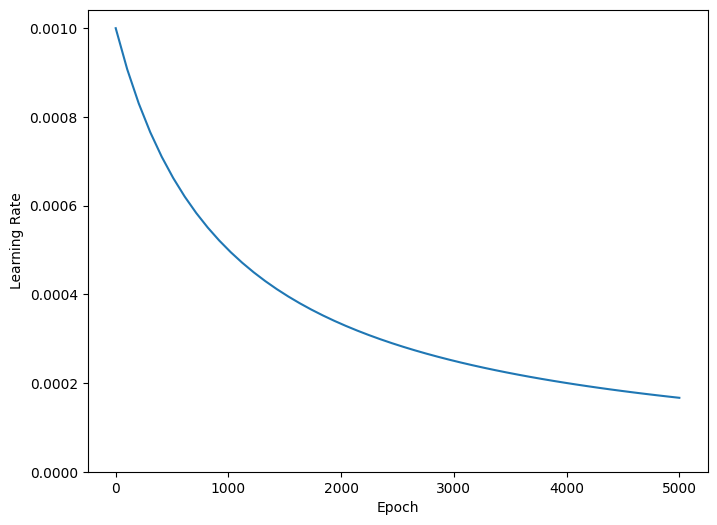

In [18]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


Setiap model pada tutorial ini akan menggunakan konfigurasi proses training yang sama. Sehingga, pengaturannya harus dilakukan agar dapat digunakan kembali, mulai dengan list dari *callback*.

Proses training dalam tutorial ini berjalan untuk banyak epoch yang pendek. Untuk mengurangi *logging noise* gunakan `tfdocs.EpochDots` yang merupakan sebuah `.` untuk tiap epoch dan sebuah set metriks lengkap setiap 100 epoch.

Selanjutnya, penggunaan `callbacks.EarlyStopping` untuk menghindari waktu training yang panjang dan tidak perlu. Perhatikan bahwa *callback* ini diatur untuk mencatat nilai `val_binary_crossentropy`, bukan `val_loss`. Perbedaan ini akan menjadi penting nanti.

Gunakan `callbacks.TensorBoard` untuk membuat log TensorBoard untuk proses training.

In [19]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

Setiap model akan menggunaka pengaturan `Model.compile` dan `Model.fit` yang sama:

In [20]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### Tiny Model

Mulai dengan training sebuah model linear:

In [21]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
size_histories = {}

In [23]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                464       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4864,  binary_crossentropy:0.7915,  loss:0.7915,  val_accuracy:0.4990,  val_binary_crossentropy:0.7502,  val_loss:0.7502,  
....................................................................................................
Epoch: 100, accuracy:0.6414,  binary_crossentropy:0.6308,  loss:0.6308,  val_accuracy:0.6400,  val_binary_crossentropy:0.6315,  val_loss:0.6315,  
............................................................

Sekarang cek bagaimana performa dari model:

(0.5, 0.7)

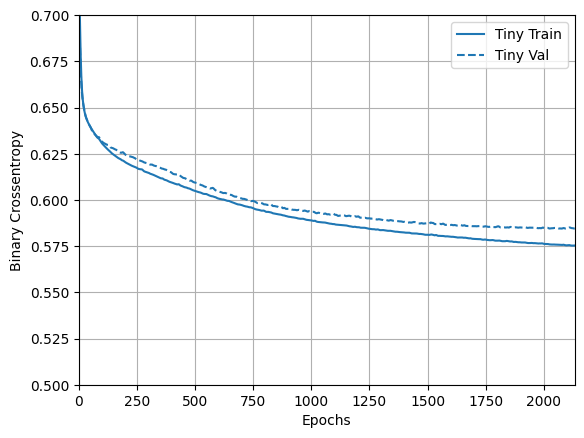

In [24]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

### Model Kecil

Untuk melihat apakah Anda bisa meningkatkan performa dari model yang lebih sederhana, cobalah secara progresif latih model yang lebih besar:

Coba gunakan dua buah *hidden layer* dengan 16 unit tiap layernya:

In [25]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

In [26]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                464       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4978,  binary_crossentropy:0.7725,  loss:0.7725,  val_accuracy:0.5200,  val_binary_crossentropy:0.7291,  val_loss:0.7291,  
....................................................................................................
Epoch: 100, accuracy:0.6640,  binary_crossentropy:0.6102,  loss:0.6102,  

### Model Medium

Sekarang coba 3 buah *hidden layer* dengan 64 unit tiap layernya:

In [27]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

Dan latih model menggunakan data yang sama:

In [28]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1856      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5399,  binary_crossentropy:0.6935,  loss:0.6935,  val_accuracy:0.5540,  val_binary_crossentropy:0.6768,  val_loss:0.6768,  
....................................

### Model Besar
Sebagai latihan, Anda dapat menggunakan model yang lebih besar lagi, dan lihat seberapa cepat model akan menjadi overfitting. Selanjutnya, mari kita tambahkan lebih banyak kapasitas untuk benchmark neural network ini:

In [29]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

Dan, latih lagi model menggnakan data yang sama:

In [30]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               14848     
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5207,  binary_crossentropy

### Plot kerugian dari training dan validasi

Garis solid menunjukkan nilai kerugian dari training, dan garis putus-putus memperlihatkan kerugian dari validasi (ingat: nilai kerugian dari validasi yang lebih rendah mengindikasikan model yang lebih baik).

Membangun sebuah model yang lebih besar memberikan kemampuan yang lebih kuat, jika kekuatan model tersebut tidak dibatasi maka model tersebut akan dengan mudah overfit terhadap set training. 

Dalam contoh ini, umumnya, hanya model `"Tiny"` yang mampu menghindari overfiting, dan setiap model yang lebih besar overfit terhadap data dengan cepat. Untuk model `"besar"` Anda perlu merubah plotnya ke dalam skala log untuk dapat melihat apa yang sebenarnya terjadi.

Hal ini menjadi jelas apabila Anda plot dan membandingkan antara metriks validasi dan metriks training.

* Normal apabila terdapat sedikit perbedaan
* Apabila kedua metriks bergerak pada arah yang sama, semuanya baik-baik saja.
* Apabila metriks validasi mulai stagnan sedangkan metriks training terus meningkat, model yang Anda buat mungkin dekat dengan overfitting.
* Apabila metriks validasi bergerak ke arah yang salah, model tersebut jelas overfitting.

Text(0.5, 0, 'Epochs [Log Scale]')

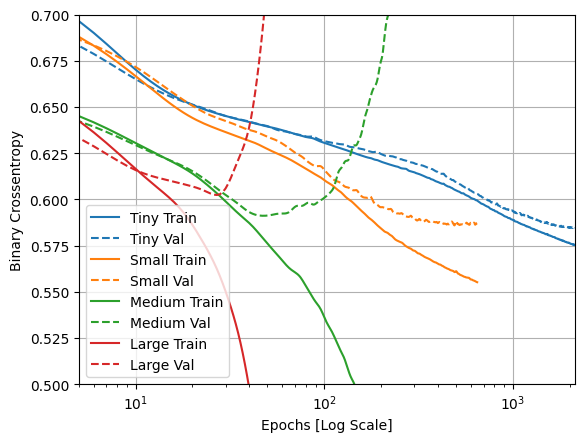

In [31]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

Catatan: Semua training proses di atas beroperasi menggunakn `callbacks.EarlyStopping` untuk mengakhiri proses training ketika model sudah tidak mengalami peningkatan performa.

### Melihat di TensorBoard

Model-model ini seluruhnya menulis log TensorBoard ketika sedang dilakukan proses training. 

Untuk membuka TensorBoard dalam notebook, salin kode berikut:

```
%tensorboard --logdir {logdir}/sizes
```

Anda dapat melihat [hasil dari operasi sebelumnya](https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorBoard.dev](https://tensorboard.dev/).

TensorBoard.dev mengatur pengalaman untuk hosting, tracking, dan sharing eksperimen ML dengan semua orang.

TensorBoard juga tersedia dalam bentuk `<iframe>` untuk kepraktisan:

In [32]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

Apabila Anda mau membagikan hasil TensorBoard Anda dapat mengupload lognya ke [TensorBoard.dev](https://tensorboard.dev/) dengan menyalin kode berikut dalam notebook.

Catatan: Langkah ini membutuhkan akun Google.

```
!tensorboard dev upload --logdir  {logdir}/sizes
```

Perhatian: Perintah ini tidak berakhir secara automotais. Hal ini didesain untuk terus menerus mengupload hasil dari eksperimen yang berlangsung. Ketika data Anda telah di upload Anda perlu mengakhirinya menggunakan opsi "interrupt execution" yang terdapat dalam notebook Anda.

## Strategi untuk menghindari overfitting

Sebelum kita masuk ke dalam konten dari bagian ini, salin log training yang didapatkan dari model `"Tiny"` di atas, kita akan menggunakannya sebagai baseline untuk perbandingan.

In [33]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/tmp/tmp3105u610/tensorboard_logs/regularizers/Tiny')

In [34]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### Menambah berat regularisasi

Anda mungkin familiar dengan prinsip Occam Razor: diberikan dua penjelasan terhadap suatu hal, penjelasan yang kemungkinan besar benar adalah penjelasan yang "paling sederhana", penjelasan yang menggunakan sedikit asumsi. Hal ini juga berlaku untuk model yang dipelajari oleh model neural network: diberikan beberapa data training dan sebuah arsitektur neural network, terdapat beberapa set dari nilai berat (beberapa model) yang dapat menjelaskan data, dan model yang lebih sederhana memiliki kemungkinan yang lebih kecil untuk overfit dibandingkan dengan model yang lebih kompleks.

Sebuah "model sederhana" dalam konteks ini adalah model yang dimana nilai distribusi parameternya memiliki entropi yang lebih rendah (atau model dengan lebih sedikit parameter, seperti yang kita lihat pada bagian sebelumnya). Sehingga cara umum untuk mengurangi *overfitting* adalah dengan memberikan batasan pada kompleksitas dari model dengan cara memaksa berat model tersebut hanya mengambil nilai yang kecil, dimana akan membuat distribusi dari nilai berat menjadi lebih "reguler". Hal ini disebut dengan "regularisasi berat", dan hal ini dapat dilakukan dengan cara menambahkan suatu *cost* pada fungsi kerugian neural network yang berasosiasi dengan berat yang besar. Tersedia dua jenis *cost* ini:

* [regularisasi L1](https://developers.google.com/machine-learning/glossary/#L1_regularization), dimana *cost* yang ditambahkan proporsional terhadap nilai absolute dari koefisien berat (sering disebut dengan "L1 norm" dari berat).

* [regularisasi L2](https://developers.google.com/machine-learning/glossary/#L2_regularization), dimana *cost* yang ditambahkan proporsional terhadap kuadrat dari nilai koefisien berat (sering disebut dengan kuadrat "L2 norm" dari berat). Regularisasi L2 disebut juga *weight decay* dalam konteks neural network. Jangan sampai nama yang berbeda membuat Anda bingung: *weight decay* secara matematis sama dengan regularisasi L2.

Regularisasi L1 mendorong berat menuju sebuah model sparse nol. Regularisasi L2 akan melakukan pinalti parameter berat tanpa membuatnya menjadi sparse karena pinalti tersebut hanya akan membuat nilai nol untuk berat yang kecil. Satu hal yang menyebabkan L2 lebih sering digunakan.

Dalam `tf.keras`, regularisasi berat ditambahkan dengan memberikan objek *weight regularizer* ke layer sebagai *keyword argument*. Mari tambahkan regularisasi berat L2 sekaarang.

In [35]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               14848     
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 1)                 513       
                                                                 
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5233,  binary_crossentropy

`l2(0.001)` berarti setiap koefisien matriks berat pada layer akan bertambah sebanyak `0.001 * weight_coefficient_value**2` dari total **kerugian** sebuah neural network.

Hal ini mengapa kita memantau nilai `binary_crossentropy` secara langsung. Karena nilai ini tidak memiliki terpengaruh oleh regularisasi komponen.

Jadi, model `"Large"` yang sama dengan regularisasi penalti `L2` memiliki performa yang lebih baik:

(0.5, 0.7)

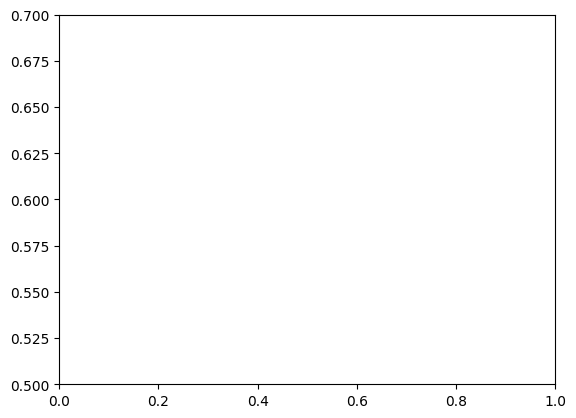

In [36]:
# plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

Seperti yang dapat Anda lihat, model yang telah diregularisasi `"L2"` sekarang jauh lebih kompetitif dengan model `"Tiny"`. Model `"L2"` lebih resisten terhadap overfitting dibandingkan dengan model `"besar"` meskipun keduanya memiliki jumlah parameter yang sama.

#### Info Tambahan

Terdapat dua hal penting yang perlu diperhatikan tentang regularisasi ini.

**Pertama:** jika Anda menulis pengulangan training Anda sendiri, Anda harus memastikan model akan mengeluarkan nilai kerugian dari regularisasinya.

In [37]:
result = l2_model(features)
regularization_loss = tf.add_n(l2_model.losses)

**Kedua:** Implementasi ini bekerja dengan cara menambahkan pinalti berat terhadap nilai kerugian dari model, kemudian melakukan prosedur optimisasi standard setelah itu.

Terdapat pendekatan kedua yaitu selain menjalankan optimizer pada *raw loss*, juga menerapkan *weight decay* terhadap optimizer. "Decopuled Weight Decay" seperti ini dapat dilihat pada optimizer seperti `optimizers.FTRL` dan `optimizers.AdamW`.

### Menambahkan dropout

Dropout merupakan salah satu cara paling efektif dan cara paling banyak digunakan sebagai teknik regularisasi pada neural network, dikembangkan oleh Hinton dan muridnya di Universitas Toronto.

Penjelasan intuitif mengenai dropout adalah karena node dalam neural network tidak dapat bergantung terhadap output dari node yang lainnya, maka setiap node harus mengeluarkan fitur-fitur yang berguna untuk dirinya sendiri.

Dropout, yang diterapkan pada sebuah layer, terdiri atas "dropping out" acak (misalkan diatur ke nilai nol) jumlah fitur output dari layer ketika proses training. Misalkan sebuah layer secara normal akan mengembalikan vektor [0.2, 0.5, 1.3, 0.8, 1.1] untuk sample input pada proses training; setelah menerapkan dropout, vektor ini akan akan memiliki beberapa nilai kosong yang terdistribusi acak, misal [0, 0.5, 1.3, 0, 1.1].

Nilai "dropout rate" adalah fraksi  fitur yang akan di nol-kan; nilai ini biasanya diatur antara 0.2 dan 0.5. Saat proses tes, tidak ada unit yang di drop, tetapi nilai output layer akan di *scaled down* dengan faktor yang sama dengan *dropout rate*, sehingga dapat menyeimbangkan karena terdapat lebih banyak unit yang aktif pada waktu training.

Dalam `tf.keras` Anda dapat menggunakan dropout dalam sebuah neural network melalui layer Dropout, dimana layer ini akan diguakan sebelum output layer.

Mari tambahkan dua layer dropout pada model neural network kita untuk melihat bagaimana teknik ini dapat mengurangi overfittng:

In [38]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               14848     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)              

(0.5, 0.7)

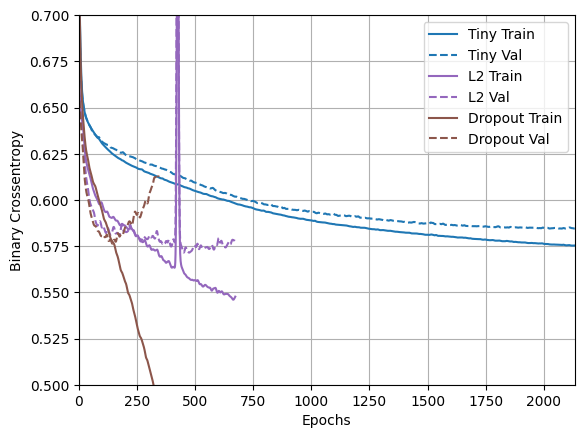

In [39]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

Sangat jelas dalam plot ini bahwa dua teknik regularisasi ini meningkatkan perilaku dari model `"besar"`. Akan tetapi, keduanya belum mampu mengalahkan model `"Tiny"`.

Selanjutnya, gunakan kedua teknik regularisasi tersebut, dan lihat apakah hal ini membuat performa model lebih baik.

### Combined L2 + dropout

In [40]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               14848     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 512)              

(0.5, 0.7)

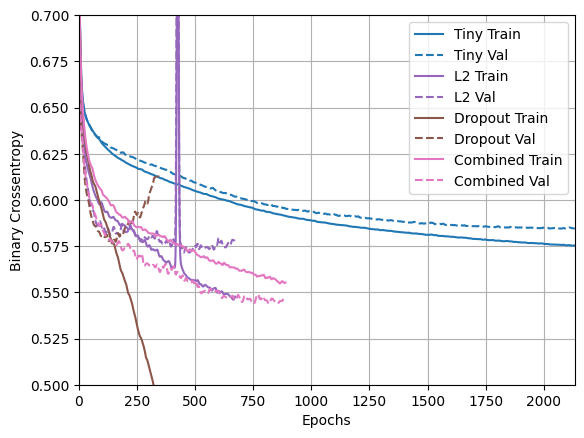

In [41]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

Model yang `"Mengkombinasikan"` dua metode regularisasi ini jelas merupakan model terbaik sejauh ini.

### Melihat di TensorBoard

Model-model ini juga dicatat di log TensorBoard.

Untuk membuka tensorboard dalam sebuah notebook, salin kode berikut ini:

```
%tensorboard --logdir {logdir}/regularizers
```

Anda dapat melihat [hasil pada operasi sebelumnya](https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorDoard.dev](https://tensorboard.dev/).

TensorBoard juga tersedia dalam bentuk `<iframe>` untuk kepraktisan:

In [42]:
display.IFrame(
    src="https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97",
    width = "100%",
    height="800px")


Ini diupload dengan:

```
!tensorboard dev upload --logdir  {logdir}/regularizers
```

## Kesimpulan

To recap: here are the most common ways to prevent overfitting in neural networks:
Untuk ringkasan: Ini beberapa cara yang umum untuk mencegah terjadinya overfitting dalam neural network:

* Menggunakan lebih banyak data training.
* Mengurangi kapasitas dari neural network.
* Menambahkan regularisasi berat
* Menambahkan dropout.

Two important approaches not covered in this guide are:
Dua pendekatan penting yang tidak dibahas dalam petunjuk ini:

* data-augmentation
* batch normalization

Ingat bahwa masing-masing metode dapat membantu mengatasi permasalahan ini, tetapi seringkali menggambungkan beberapa metode dapat menjadi lebih efektif.